# Fashion Trend Forcasting

In this Data Science project, we work with a dataset crawled from the [Amazon Men's Clothing](https://www.amazon.com/Men-Clothing/b?ie=UTF8&node=1040658) website. Our ultimate goal is when given a new product unreleased on the platform, we will be able to forecast its **total rating** and **weighted rating**.

## Import Libraries and Read Data

In [73]:
# Libraries to manipulate data
import numpy as np
import pandas as pd
import json

# Modules, classes, and methods from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from pyampute.exploration.md_patterns import mdPatterns
from pyampute.exploration.mcar_statistical_tests import MCARTest

# Others
import matplotlib.pyplot as plt
import joblib

## Read the Dataset and Split it into Train Set and Test Set

In [74]:
# Read the data from the json file
data_path = "../data/raw/fashion_products.json"
with open(data_path) as f:
    data = json.load(f)

# Normalize the data and create a dataframe
df = pd.json_normalize(data)
df.head()

,title,price_min,price_max,rating_total,rating_percent,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,...,product_details.Sole material,product_details.Water resistance level,product_details.Sleeve type,product_details.Inseam,product_details.Shaft height,product_details.Pocket style,product_details.Shaft circumference,product_details.Inner material,product_details.Material,product_details.Item type name
0,adidas Men's Athletic Cushioned Crew Socks wit...,13.99,13.99,42763,"[79, 12, 5, 2, 2]","[Black/Aluminum 2, Heather Grey/Black, White/B...",Cushioned in the foot for comfort and durabili...,"97% Polyester, 3% Spandex",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nike Performance Cushion Crew Socks with Band ...,28.22,37.00,8619,"[79, 10, 5, 2, 5]","[Black/White, White/Black]",Reinforced heel and toe for enhanced durabilit...,76% Cotton/21% Nylon/2% Spandex/1% Polyester,Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thermajohn Long Johns Thermal Underwear for Me...,25.49,31.99,52418,"[76, 14, 5, 2, 3]","[Black, Charcoal, Grey, Navy, White, Christmas...",Heat Retention: When it comes to warmth and ev...,"92% Polyester, 8% Spandex",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Calvin Klein Men's Cotton Stretch 7-Pack Boxer...,54.05,76.53,12714,"[75, 12, 6, 3, 6]","[2 Blue Shadow, 2 White, 2 Black, 1 Cobalt Wat...","COTTON STRETCH: Spun in pure, premium cotton y...","95% Cotton, 5% Elastane",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Hanes Men's Hoodie, EcoSmart Fleece Hoodie, Ho...",11.46,11.46,176801,"[72, 15, 7, 3, 4]","[Army Brown, Ash, Black, Cardinal, Charcoal He...",FLEECE TO FEEL GOOD ABOUT - Hanes EcoSmart men...,"50% Cotton, 50% Polyester",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   title                                   4690 non-null   object 
 1   price_min                               4690 non-null   float64
 2   price_max                               4690 non-null   float64
 3   rating_total                            4690 non-null   int64  
 4   rating_percent                          4580 non-null   object 
 5   variants                                4690 non-null   object 
 6   product_about                           4690 non-null   object 
 7   product_details.Fabric type             4526 non-null   object 
 8   product_details.Care instructions       4449 non-null   object 
 9   product_details.Origin                  4049 non-null   object 
 10  product_details.Fit type                146 non-null    obje

- By observing basic information of the data using the `.info()` method, we can see that there are many columns missing very large proportion of data.

In [76]:
# # NOTICE: WE ONLY RUN THIS PIECE OF CODE 1 TIME. PLEASE DON'T UNCOMMENT
# # CHÚ Ý: ĐỪNG THÁO COMMENT ĐOẠN CODE NÀY

# # Sample 80% of the data for training and 20% for testing
# train, test = train_test_split(df, test_size=0.2)

# # Save the train and test data
# train.to_csv("../data/raw/train.csv", index=False)
# test.to_csv("../data/raw/test.csv", index=False)

## Data Preparation

In [77]:
# Read the train set
train_df = pd.read_csv("../data/raw/train.csv")

# Inspect the train set
train_df.head()

,title,price_min,price_max,rating_total,rating_percent,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,...,product_details.Sole material,product_details.Water resistance level,product_details.Sleeve type,product_details.Inseam,product_details.Shaft height,product_details.Pocket style,product_details.Shaft circumference,product_details.Inner material,product_details.Material,product_details.Item type name
0,THE NORTH FACE Men's Canyonlands Hoodie,99.99,100.00,3,"[63, 0, 37, 0, 0]","['Algae Blue Heather', 'Earthen Copper Heather...",ADVENTURE READY. The Men's Canyonlands Hoodie ...,"96% Recycled Polyester, 4% Elastane Fleece",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Under Armour Men's Fleece Twist Quarter Zip,41.98,60.00,107,"[78, 12, 8, 0, 3]","['(001) Black / / Black', '(012) Pitch Gray / ...","Armour Fleece is light, breathable & stretchy ...",100% Polyester,Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"G Gradual Men's Sweatpants Open Bottom, Workou...",25.99,25.99,1869,"[63, 19, 9, 4, 5]","['01-black', '01-grey', '02-black', '02-black ...",Mesh Material and Performance: The mens sweatp...,"95% Polyester, 5% Spandex",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Elastic Bottom Baggy Sweatpants for Men, Worko...",29.99,29.99,2888,"[67, 16, 8, 3, 5]","['Black', 'Charcoal', 'Grey', 'Navy', 'Brown',...",Unbeatable All-Day Comfort - Experience the lu...,100% Polyester,Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Winterlace 24 Pairs Cotton Crew Socks, Mens Wo...",33.99,33.99,1674,"[63, 13, 11, 5, 9]","['Assorted (White/Black/Gray)', 'Black', 'Blac...",COTTON CREW SOCKS : Crafted from a comfortable...,"80% Cotton, 18% Polyester, 2% Spandex",Machine Wash,China,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

#### Handle Missing Data

In [78]:
# We will drop columns with more than 30% missing values.
null_percents = train_df.isnull().sum() / len(train_df) * 100
null_percents

title                                       0.000000
price_min                                   0.000000
price_max                                   0.000000
rating_total                                0.000000
rating_percent                              2.345416
variants                                    0.000000
product_about                               1.305970
product_details.Fabric type                 3.624733
product_details.Care instructions           5.010661
product_details.Origin                     13.619403
product_details.Fit type                   96.934968
product_details.Pattern                    86.860341
product_details.Closure type               55.490405
product_details.Rise style                 98.027719
product_details.Weave type                 97.627932
product_details.Country of Origin          92.324094
product_details.Neck style                 95.549041
product_details.Leg style                  99.546908
product_details.Fur description            99.

In [79]:
drop_columns = [column for column in null_percents.index if null_percents[column] > 30]
drop_columns

['product_details.Fit type',
 'product_details.Pattern',
 'product_details.Closure type',
 'product_details.Rise style',
 'product_details.Weave type',
 'product_details.Country of Origin',
 'product_details.Neck style',
 'product_details.Leg style',
 'product_details.Fur description',
 'product_details.Outer material',
 'product_details.Length',
 'product_details.Bottom style',
 'product_details.Sole material',
 'product_details.Water resistance level',
 'product_details.Sleeve type',
 'product_details.Inseam',
 'product_details.Shaft height',
 'product_details.Pocket style',
 'product_details.Shaft circumference',
 'product_details.Inner material',
 'product_details.Material',
 'product_details.Item type name']

- Later, when we deal with the test set, we also need to drop these columns to align with the train set.

In [80]:
# Now, we will drop the columns with more than 30% missing values.
train_df = train_df.drop(columns=drop_columns)
train_df.head()

,title,price_min,price_max,rating_total,rating_percent,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin
0,THE NORTH FACE Men's Canyonlands Hoodie,99.99,100.00,3,"[63, 0, 37, 0, 0]","['Algae Blue Heather', 'Earthen Copper Heather...",ADVENTURE READY. The Men's Canyonlands Hoodie ...,"96% Recycled Polyester, 4% Elastane Fleece",Machine Wash,Imported
1,Under Armour Men's Fleece Twist Quarter Zip,41.98,60.00,107,"[78, 12, 8, 0, 3]","['(001) Black / / Black', '(012) Pitch Gray / ...","Armour Fleece is light, breathable & stretchy ...",100% Polyester,Machine Wash,Imported
2,"G Gradual Men's Sweatpants Open Bottom, Workou...",25.99,25.99,1869,"[63, 19, 9, 4, 5]","['01-black', '01-grey', '02-black', '02-black ...",Mesh Material and Performance: The mens sweatp...,"95% Polyester, 5% Spandex",Machine Wash,Imported
3,"Elastic Bottom Baggy Sweatpants for Men, Worko...",29.99,29.99,2888,"[67, 16, 8, 3, 5]","['Black', 'Charcoal', 'Grey', 'Navy', 'Brown',...",Unbeatable All-Day Comfort - Experience the lu...,100% Polyester,Machine Wash,Imported
4,"Winterlace 24 Pairs Cotton Crew Socks, Mens Wo...",33.99,33.99,1674,"[63, 13, 11, 5, 9]","['Assorted (White/Black/Gray)', 'Black', 'Blac...",COTTON CREW SOCKS : Crafted from a comfortable...,"80% Cotton, 18% Polyester, 2% Spandex",Machine Wash,China


In [81]:
# Check the result after dropping columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   rating_percent                     3664 non-null   object 
 5   variants                           3752 non-null   object 
 6   product_about                      3703 non-null   object 
 7   product_details.Fabric type        3616 non-null   object 
 8   product_details.Care instructions  3564 non-null   object 
 9   product_details.Origin             3241 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 293.2+ KB


- We need to admit that there are features/variables we cannot impute, those are:
  - `rating_percent`
  - `product_about`
  - `product_details.Fabric type`
  - `product_details.Care instructions`
  - `product_details.Origin`
- We need to decide whether to drop rows missing these feature or fill them with `"unknown"` (for categorical variable) or 0 (for numerical variable). At this point, we choose not to drop any rows but fill them instead.

##### Rating percent

In [82]:
# Check for missing values on "rating_percent" column
train_df['rating_percent'].isnull().sum()

88

In [83]:
# Convert 'rating_percent' from string like "[[76, 12, 7, 2, 3]]"" to list of integers
def convert_rating_percent(x) -> list:
    # If x is not string, return an empty list
    if not isinstance(x, str):
        return []

    x = x.replace('None', '0')
    x = x.strip('[]').split(', ')
    result = list(map(int, x))
    
    return result

train_df['rating_percent'] = train_df['rating_percent'].apply(convert_rating_percent)
train_df['rating_percent']

0        [63, 0, 37, 0, 0]
1        [78, 12, 8, 0, 3]
2        [63, 19, 9, 4, 5]
3        [67, 16, 8, 3, 5]
4       [63, 13, 11, 5, 9]
               ...        
3747     [82, 11, 3, 2, 2]
3748      [82, 9, 3, 3, 2]
3749     [100, 0, 0, 0, 0]
3750     [65, 18, 8, 3, 5]
3751      [87, 7, 3, 2, 1]
Name: rating_percent, Length: 3752, dtype: object

- By observing the result of the cell above, we can see that the last row (the `3751`th row) has its sum not to be `100`, which is illogical because the total percentage of all type of ratings (from `1` to `5`) must be `100%`. So, we can feel that there'r something weird about the values of this `rating_percent` column; thereby needing to investigate. We will calculate the sum of each rows in this column and inspect the unique sums resulted.

In [84]:
train_df['rating_percent'].apply(lambda x: sum(x)).value_counts()

100    2261
99      720
101     668
0        88
98        9
102       6
Name: rating_percent, dtype: int64

- We admit that the amount of errorneous values are huge and therefore dropping all of them can cause a unacceptable loss of information. So, we need to find out a way to scale each values of the column to make their sum become 100 without significantly changing the actual meaning of them.

In [85]:
def scale_rating_percent(rating_percent: list[int]) -> list[int]:
    """
    This function scales the rating_percent list to make its sum to be 100.
    """
    
    # If after the conversion above, the rating percent is empty,
    # in this function, we will do nothing.
    if len(rating_percent) == 0:
        return rating_percent
    
    current_sum = sum(rating_percent)
    
    if current_sum == 100:
        return rating_percent
    
    values_to_distribute = 100 - current_sum # This can be positive or negative.
    
    unit = 1 if values_to_distribute > 0 else -1
    
    for i in range(abs(values_to_distribute)):
        # Add unit to a random position in rating_percent
        rating_percent[np.random.randint(5)] += unit
    
    return rating_percent

In [86]:
# Let's test the function above with an errorneous list
errorneous_list = [77, 10, 6, 2, 7]
sum(scale_rating_percent(errorneous_list))

100

- Okay it's worked. Now we apply this function on the `rating_percent` column.

In [87]:
train_df['rating_percent'] = train_df['rating_percent'].apply(scale_rating_percent)
train_df['rating_percent'].apply(lambda x: sum(x)).value_counts()

100    3664
0        88
Name: rating_percent, dtype: int64

In [88]:
def calc_weighted_rating(rating_percent) -> np.float64:
    if len(rating_percent) != 5:
        return np.nan
    
    rating_percent = np.array(rating_percent.copy()) / 100
    rating_scale = [5, 4, 3, 2, 1]
    
    return np.dot(rating_percent, rating_scale)

In [89]:
train_df['weighted_rating'] = train_df['rating_percent'].apply(func=calc_weighted_rating)
train_df['weighted_rating'].head()

0    4.26
1    4.61
2    4.31
3    4.38
4    4.17
Name: weighted_rating, dtype: float64

In [90]:
train_df.drop(columns=['rating_percent'], inplace=True)
train_df.head()

,title,price_min,price_max,rating_total,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,weighted_rating
0,THE NORTH FACE Men's Canyonlands Hoodie,99.99,100.00,3,"['Algae Blue Heather', 'Earthen Copper Heather...",ADVENTURE READY. The Men's Canyonlands Hoodie ...,"96% Recycled Polyester, 4% Elastane Fleece",Machine Wash,Imported,4.26
1,Under Armour Men's Fleece Twist Quarter Zip,41.98,60.00,107,"['(001) Black / / Black', '(012) Pitch Gray / ...","Armour Fleece is light, breathable & stretchy ...",100% Polyester,Machine Wash,Imported,4.61
2,"G Gradual Men's Sweatpants Open Bottom, Workou...",25.99,25.99,1869,"['01-black', '01-grey', '02-black', '02-black ...",Mesh Material and Performance: The mens sweatp...,"95% Polyester, 5% Spandex",Machine Wash,Imported,4.31
3,"Elastic Bottom Baggy Sweatpants for Men, Worko...",29.99,29.99,2888,"['Black', 'Charcoal', 'Grey', 'Navy', 'Brown',...",Unbeatable All-Day Comfort - Experience the lu...,100% Polyester,Machine Wash,Imported,4.38
4,"Winterlace 24 Pairs Cotton Crew Socks, Mens Wo...",33.99,33.99,1674,"['Assorted (White/Black/Gray)', 'Black', 'Blac...",COTTON CREW SOCKS : Crafted from a comfortable...,"80% Cotton, 18% Polyester, 2% Spandex",Machine Wash,China,4.17


In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   variants                           3752 non-null   object 
 5   product_about                      3703 non-null   object 
 6   product_details.Fabric type        3616 non-null   object 
 7   product_details.Care instructions  3564 non-null   object 
 8   product_details.Origin             3241 non-null   object 
 9   weighted_rating                    3660 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 293.2+ KB


- Actually, from the start of this step (Handling Missing Data) until this point, we're just doing feature engineering on `rating_percent`, no actual "handling missing data" was performed. But as we wrote above (right before the "Rating percent" cell), there're just only 2 strategies that we chose to handle missing data in this step: dropping or filling (Why? Simply because we want to keep the "Imputation and Removal" step separately later.), **AND** both strategies won't work well on the `weighted_rating`, **SO** we decide to impute the weighted_rating later in the "Imputation and Removal" step. But why do we think both strategies won't work well?
  - Why not "dropping"? Simply because we want to keep as much data points as we can. 
  - Why not "filling"? Because we think it is feasible to do imputation for missing values on this column.

##### Product about, Fabric type, Care instructions and Origin

In [92]:
# Fill missing value of `product_about` with empty string
train_df['product_about'] = train_df['product_about'].fillna('')

# Fill missing value of `product_details.Fabric type`, `product_details.Care instructions`,
# and `product_details.Origin` with "unknown"
train_df['product_details.Fabric type'] = train_df['product_details.Fabric type'].fillna('unknown')
train_df['product_details.Care instructions'] = train_df['product_details.Care instructions'].fillna('unknown')
train_df['product_details.Origin'] = train_df['product_details.Origin'].fillna('unknown')

In [93]:
# Let's check the result after filling missing values of those `object`-typed columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   variants                           3752 non-null   object 
 5   product_about                      3752 non-null   object 
 6   product_details.Fabric type        3752 non-null   object 
 7   product_details.Care instructions  3752 non-null   object 
 8   product_details.Origin             3752 non-null   object 
 9   weighted_rating                    3660 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 293.2+ KB


#### Encode Categorical Variables

- As far as we've learned, we think it will be the best to encode categorical variables before stepping into any imputation or removal tasks.

In [94]:
# Count unique values of each column
unique_values = train_df.nunique()
unique_values

title                                3716
price_min                            1409
price_max                            1216
rating_total                         2274
variants                             3045
product_about                        3500
product_details.Fabric type          1266
product_details.Care instructions     192
product_details.Origin                 60
weighted_rating                       339
dtype: int64

In [95]:
train_df['product_details.Fabric type'].value_counts()

100% Polyester                                                          489
100% Cotton                                                             475
unknown                                                                 136
Polyester                                                                93
60% Cotton, 40% Polyester                                                78
                                                                       ... 
55% Cotton, 45% Polyester. All inner sherpa lined including sleeves.      1
Outer: 95% Cotton, 5% Spandex; Lining: Polyester                          1
52.7% cotton, 22.8% nylon, 5.6% spandex, 18.9% polyester                  1
90% Polyester/10% Spandex, Elastic Fabric                                 1
79% Merino Wool 20% Nylon 1% Lycra Spandex                                1
Name: product_details.Fabric type, Length: 1266, dtype: int64

- We can see that the values in this column are not initially suitable to be encoded and doing data cleaning on this column is time-consuming. Therefore, we will embed them using a small embedding model in the Feature Engineering step later. And this happens the same with `product_details.Care instructions` and `product_details.Origin`.

#### Imputation and Removal

- In this sub-step of imputation and removal, we only need to impute the missing values of the `weighted_rating` column. But, before doing any "imputation", we need to determine the "missing data mechanism" of this column in order to choose the appropriate "imputation method".
- There are 3 missing data mechanisms:
  - **Missing Completely at Random (MCAR)**: The missingness is totally random and unrelated to any data. Imputation here is straightforward and less likely to introduce bias.
  - **Missing at Random (MAR)**: The missingness is related to other observed variables but not the missing one itself. With the right techniques, imputation can still be effective.
  - **Missing Not at Random (MNAR)**: The missingness is related to the value of the missing data itself. Imputation in this scenario is tricky and can introduce bias.

##### Missing Data Mechanism of `weighted_rating`

In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   variants                           3752 non-null   object 
 5   product_about                      3752 non-null   object 
 6   product_details.Fabric type        3752 non-null   object 
 7   product_details.Care instructions  3752 non-null   object 
 8   product_details.Origin             3752 non-null   object 
 9   weighted_rating                    3660 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 293.2+ KB


In [97]:
numerical_columns = train_df.select_dtypes(include=[np.number]).columns
mt = MCARTest(method="little")
mt.little_mcar_test(train_df[numerical_columns])

0.0

- This is a very low p-value for Little's test (`p-value < 0.05`), so we can reject the null hypothesis that our data are MCAR. Therefore, the missing mechanism of our data should be MAR or MNAR.
- In order to check whether our data is MAR or not, we need to see if missingness of `weighted_rating` is related to known variables or not.

In [98]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   variants                           3752 non-null   object 
 5   product_about                      3752 non-null   object 
 6   product_details.Fabric type        3752 non-null   object 
 7   product_details.Care instructions  3752 non-null   object 
 8   product_details.Origin             3752 non-null   object 
 9   weighted_rating                    3660 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 293.2+ KB


- To check if our data is MAR, for each variable excluding `weighted_rating`, we need to split their values into 2 groups: 1 corresponding to missing values of `weighted_rating`, and 1 corresponding to observed values of `weighted rating`. For a variable, we need to see if the distributions of these 2 groups are significantly different and if they are, the missingness of `weighted rating` may not relate to values of this variable.

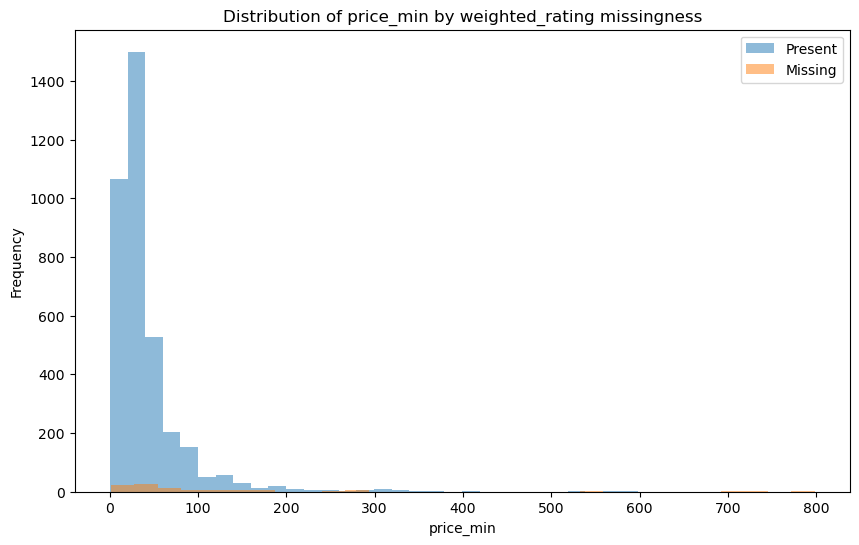

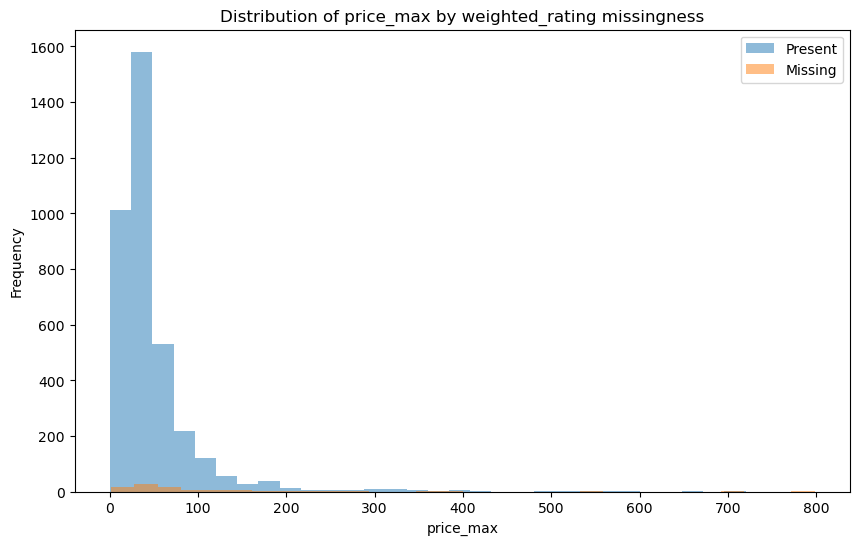

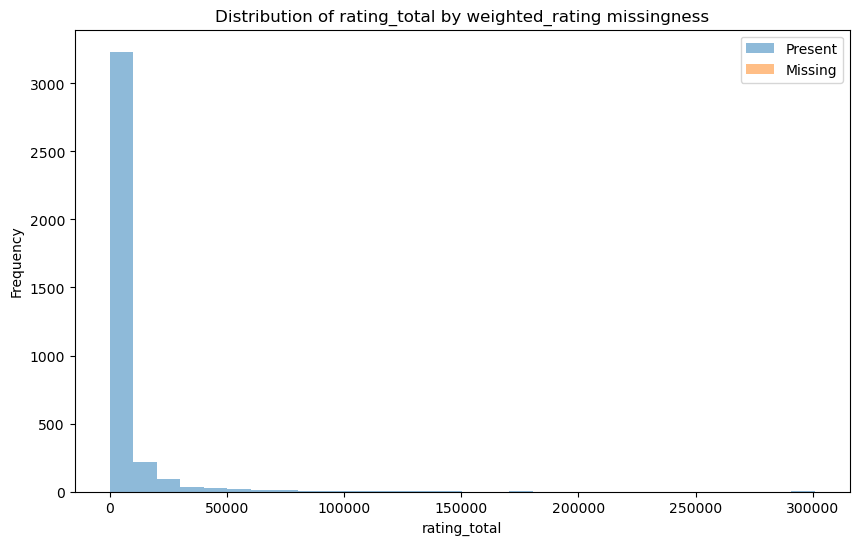

In [99]:
def visualize_distributions_for_mnar_test(df: pd.DataFrame, var: str):
    # Create a column named `{var}_missing` indicating
    # if the weighted_rating of that row is missing or not
    df[f'{var}_missing'] = df[var].isnull()
    
    # Get numerical columns
    numerical_columns = df.select_dtypes(include=np.number)
    
    # Loop over columns in numerical columns
    for column in numerical_columns.columns:
        if column == var:  # Skip the column we're testing
            continue
            
        # Select rows where var is NOT missing (group_missing=False)
        group_not_missing = df[~df[f'{var}_missing']][column]
        
        # Select rows where var IS missing (group_missing=True)
        group_missing = df[df[f'{var}_missing']][column]
        
        # Only plot if we have valid data
        if len(group_missing) > 0 and len(group_not_missing) > 0:
            plt.figure(figsize=(10, 6))
            plt.hist(group_not_missing.dropna(), bins=30, alpha=0.5, label='Present')
            plt.hist(group_missing.dropna(), bins=30, alpha=0.5, label='Missing')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.title(f'Distribution of {column} by {var} missingness')
            plt.legend()
            plt.show()
        
    # Drop the temporary missing indicator column
    df.drop(columns=[f'{var}_missing'], inplace=True)
    
visualize_distributions_for_mnar_test(train_df, 'weighted_rating')

- Based on the histograms above, we can see that the missingness of `weighted rating` may not relate to any of these variables above. In other words, our data may not be MAR, but might be MNAR instead. And in the case of MNAR, we should be really careful when doing imputation because it's really easy to introduce biases. So at this point, we decide to drop these missing values of `weighted rating`.

In [100]:
# Drop rows missing `weighted rating`
train_df = train_df.dropna(subset=['weighted_rating'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3660 non-null   object 
 1   price_min                          3660 non-null   float64
 2   price_max                          3660 non-null   float64
 3   rating_total                       3660 non-null   int64  
 4   variants                           3660 non-null   object 
 5   product_about                      3660 non-null   object 
 6   product_details.Fabric type        3660 non-null   object 
 7   product_details.Care instructions  3660 non-null   object 
 8   product_details.Origin             3660 non-null   object 
 9   weighted_rating                    3660 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 314.5+ KB


#### Handle Duplicates

In [101]:
# Identify duplicate rows
duplicates = train_df.duplicated()
duplicates.sum()

9

In [102]:
# Remove duplicate rows
train_df = train_df.drop_duplicates()
train_df.shape

(3651, 10)

In [103]:
train_df.head()

,title,price_min,price_max,rating_total,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,weighted_rating
0,THE NORTH FACE Men's Canyonlands Hoodie,99.99,100.00,3,"['Algae Blue Heather', 'Earthen Copper Heather...",ADVENTURE READY. The Men's Canyonlands Hoodie ...,"96% Recycled Polyester, 4% Elastane Fleece",Machine Wash,Imported,4.26
1,Under Armour Men's Fleece Twist Quarter Zip,41.98,60.00,107,"['(001) Black / / Black', '(012) Pitch Gray / ...","Armour Fleece is light, breathable & stretchy ...",100% Polyester,Machine Wash,Imported,4.61
2,"G Gradual Men's Sweatpants Open Bottom, Workou...",25.99,25.99,1869,"['01-black', '01-grey', '02-black', '02-black ...",Mesh Material and Performance: The mens sweatp...,"95% Polyester, 5% Spandex",Machine Wash,Imported,4.31
3,"Elastic Bottom Baggy Sweatpants for Men, Worko...",29.99,29.99,2888,"['Black', 'Charcoal', 'Grey', 'Navy', 'Brown',...",Unbeatable All-Day Comfort - Experience the lu...,100% Polyester,Machine Wash,Imported,4.38
4,"Winterlace 24 Pairs Cotton Crew Socks, Mens Wo...",33.99,33.99,1674,"['Assorted (White/Black/Gray)', 'Black', 'Blac...",COTTON CREW SOCKS : Crafted from a comfortable...,"80% Cotton, 18% Polyester, 2% Spandex",Machine Wash,China,4.17


### Data Transformation

#### Standardize Column Names

In [104]:
train_df.columns

Index(['title', 'price_min', 'price_max', 'rating_total', 'variants',
       'product_about', 'product_details.Fabric type',
       'product_details.Care instructions', 'product_details.Origin',
       'weighted_rating'],
      dtype='object')

In [105]:
def standardize_column_names(col_name: str) -> str:
    # Delete 'product_details.'
    new_name = col_name.replace('product_details.', '')
    
    # Replace '_' with ' '
    new_name = new_name.replace('_', ' ')
    
    # Lowercase column names
    new_name = new_name.lower()
    
    return new_name

new_col_names = [standardize_column_names(col_name) for col_name in train_df.columns]
train_df.columns = new_col_names
train_df.head()

,title,price min,price max,rating total,variants,product about,fabric type,care instructions,origin,weighted rating
0,THE NORTH FACE Men's Canyonlands Hoodie,99.99,100.00,3,"['Algae Blue Heather', 'Earthen Copper Heather...",ADVENTURE READY. The Men's Canyonlands Hoodie ...,"96% Recycled Polyester, 4% Elastane Fleece",Machine Wash,Imported,4.26
1,Under Armour Men's Fleece Twist Quarter Zip,41.98,60.00,107,"['(001) Black / / Black', '(012) Pitch Gray / ...","Armour Fleece is light, breathable & stretchy ...",100% Polyester,Machine Wash,Imported,4.61
2,"G Gradual Men's Sweatpants Open Bottom, Workou...",25.99,25.99,1869,"['01-black', '01-grey', '02-black', '02-black ...",Mesh Material and Performance: The mens sweatp...,"95% Polyester, 5% Spandex",Machine Wash,Imported,4.31
3,"Elastic Bottom Baggy Sweatpants for Men, Worko...",29.99,29.99,2888,"['Black', 'Charcoal', 'Grey', 'Navy', 'Brown',...",Unbeatable All-Day Comfort - Experience the lu...,100% Polyester,Machine Wash,Imported,4.38
4,"Winterlace 24 Pairs Cotton Crew Socks, Mens Wo...",33.99,33.99,1674,"['Assorted (White/Black/Gray)', 'Black', 'Blac...",COTTON CREW SOCKS : Crafted from a comfortable...,"80% Cotton, 18% Polyester, 2% Spandex",Machine Wash,China,4.17


#### Handle Outliers

In [106]:
train_df.head()

,title,price min,price max,rating total,variants,product about,fabric type,care instructions,origin,weighted rating
0,THE NORTH FACE Men's Canyonlands Hoodie,99.99,100.00,3,"['Algae Blue Heather', 'Earthen Copper Heather...",ADVENTURE READY. The Men's Canyonlands Hoodie ...,"96% Recycled Polyester, 4% Elastane Fleece",Machine Wash,Imported,4.26
1,Under Armour Men's Fleece Twist Quarter Zip,41.98,60.00,107,"['(001) Black / / Black', '(012) Pitch Gray / ...","Armour Fleece is light, breathable & stretchy ...",100% Polyester,Machine Wash,Imported,4.61
2,"G Gradual Men's Sweatpants Open Bottom, Workou...",25.99,25.99,1869,"['01-black', '01-grey', '02-black', '02-black ...",Mesh Material and Performance: The mens sweatp...,"95% Polyester, 5% Spandex",Machine Wash,Imported,4.31
3,"Elastic Bottom Baggy Sweatpants for Men, Worko...",29.99,29.99,2888,"['Black', 'Charcoal', 'Grey', 'Navy', 'Brown',...",Unbeatable All-Day Comfort - Experience the lu...,100% Polyester,Machine Wash,Imported,4.38
4,"Winterlace 24 Pairs Cotton Crew Socks, Mens Wo...",33.99,33.99,1674,"['Assorted (White/Black/Gray)', 'Black', 'Blac...",COTTON CREW SOCKS : Crafted from a comfortable...,"80% Cotton, 18% Polyester, 2% Spandex",Machine Wash,China,4.17


In [107]:
# Function to draw boxplot given column name
def draw_boxplot(df, column_name):
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[column_name], vert=False)
    plt.title(f'Boxplot of {column_name}')
    plt.show()

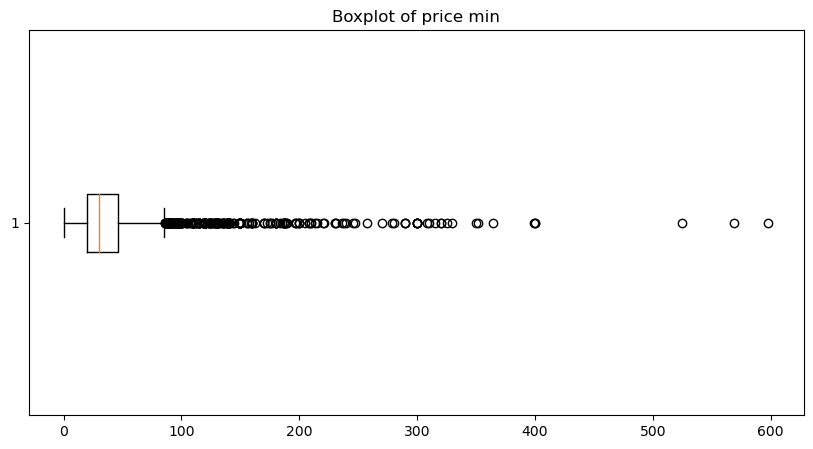

In [108]:
# Draw boxplot for "price min"
draw_boxplot(train_df, 'price min')

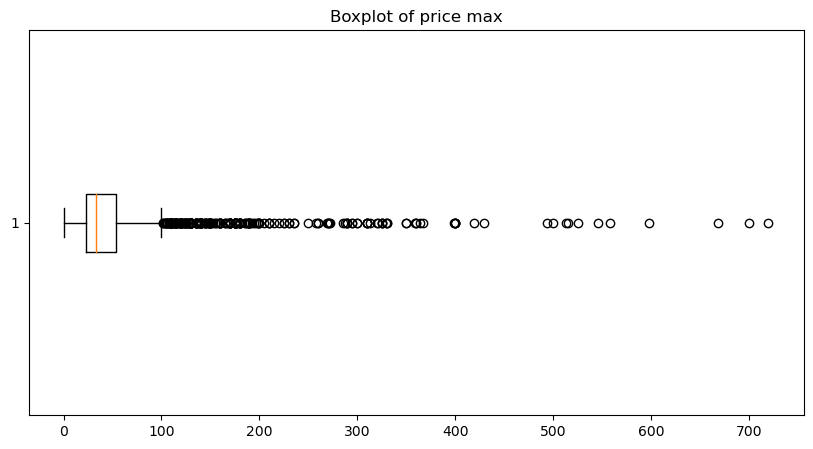

In [109]:
# Draw boxplot for "Price max"
draw_boxplot(train_df, 'price max')

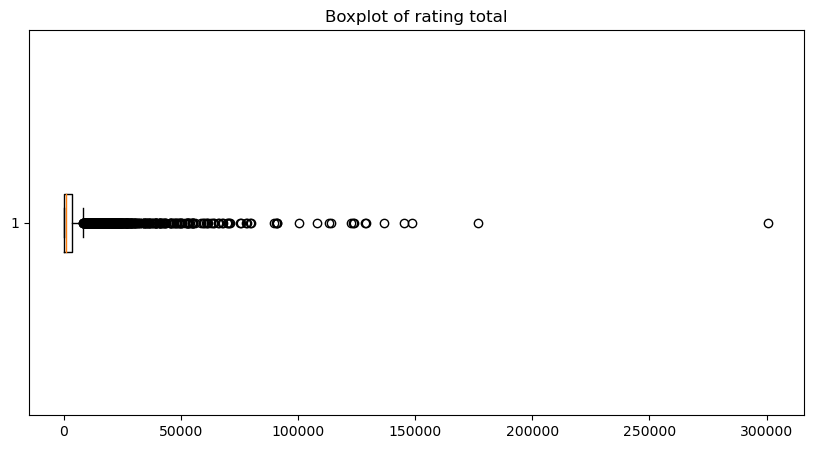

In [110]:
# Draw boxplot for "Rating total"
draw_boxplot(train_df, 'rating total')

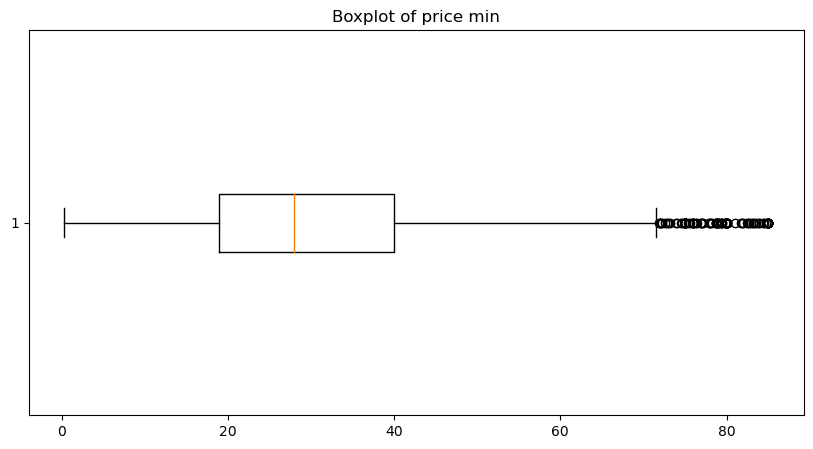

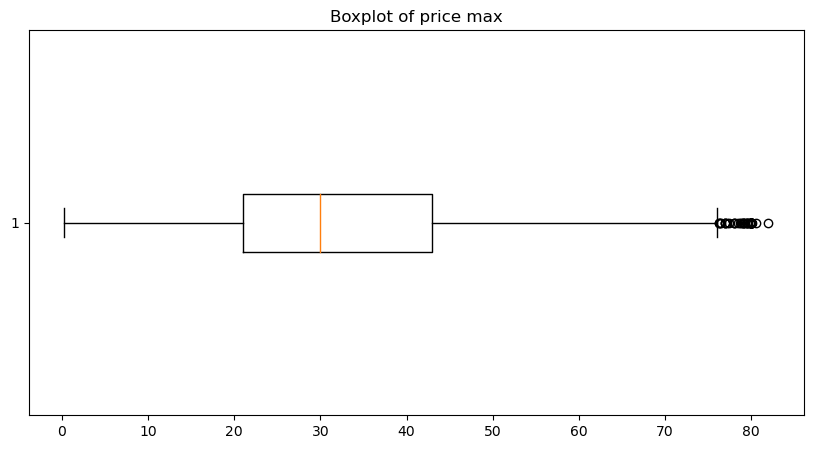

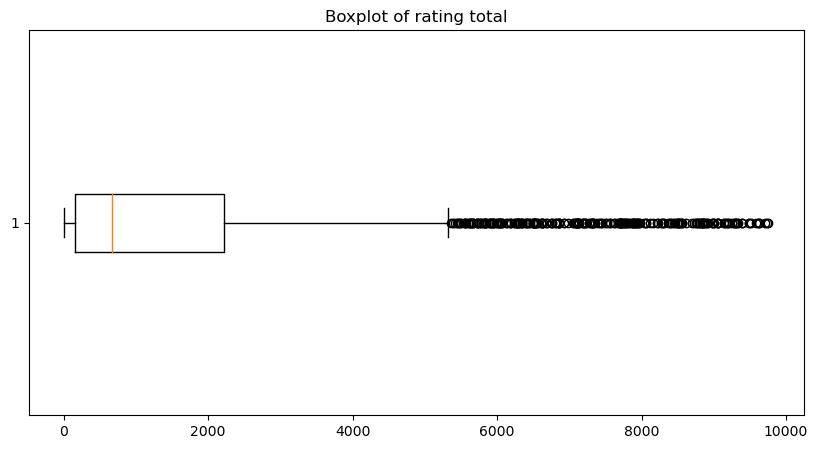

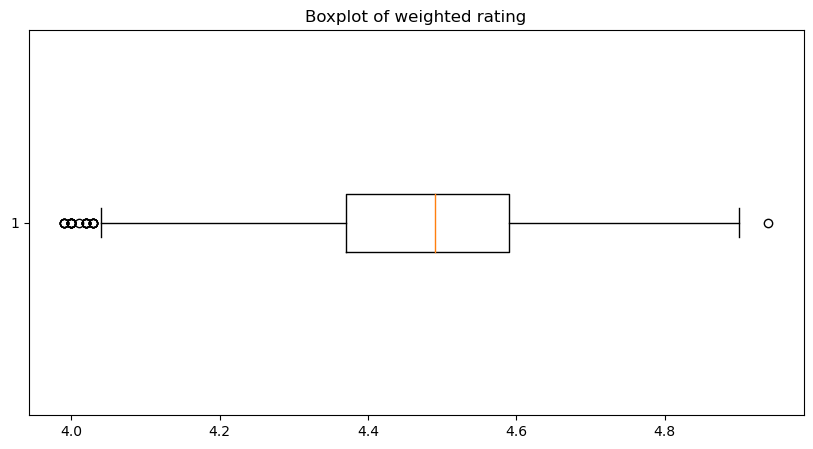

In [111]:
# Iterate over the numerical columns
numerical_columns = ["price min", "price max", "rating total", "weighted rating"]
for column in numerical_columns:
    # Calculate IQR
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows with outliers
    train_df = train_df[(train_df[column] >= lower_bound) & (train_df[column] <= upper_bound)]
    
    # Draw boxplot
    draw_boxplot(train_df, column)

### Feature Engineering

In [112]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2682 entries, 1 to 3751
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2682 non-null   object 
 1   price min          2682 non-null   float64
 2   price max          2682 non-null   float64
 3   rating total       2682 non-null   int64  
 4   variants           2682 non-null   object 
 5   product about      2682 non-null   object 
 6   fabric type        2682 non-null   object 
 7   care instructions  2682 non-null   object 
 8   origin             2682 non-null   object 
 9   weighted rating    2682 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 230.5+ KB


#### One-hot Encoding for Care Instructions: `machine washable`?

In [113]:
train_df['care instructions'] = train_df['care instructions'].apply(lambda x: x.lower())
train_df['machine wash'] = train_df['care instructions'].apply(lambda x: 1 if 'machine wash' in x else 0)
train_df.drop(columns=['care instructions'], inplace=True)

#### One-hot Encoding for `origin`: `made in usa`, `imported` or `unknown`?

In [114]:
train_df['origin'] = train_df['origin'].apply(lambda x: x.lower())
train_df['origin usa'] = train_df['origin'].apply(lambda x: 1 if 'us' in x else 0)
train_df['origin imported'] = train_df['origin'].apply(lambda x: 1 if 'import' in x else 0)
train_df['origin unknown'] = train_df['origin'].apply(lambda x: 1 if 'us' not in x and 'import' not in x else 0)
train_df.drop(columns=['origin'], inplace=True)

#### One-hot Encoding for `variants`

If there is a variant with a color, the feature is set to 1, otherwise 0.

In [115]:
import re

train_df['variants'] = train_df['variants'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x.lower()))

all_colors = ['beige', 'black', 'blue', 'brown', 'gold', 'gray', 'green', 'grey', 
              'khaki', 'navy', 'orange', 'pink', 'purple', 'red', 'silver', 'white', 'yellow']

for color in all_colors:
    train_df[f'color {color}'] = train_df['variants'].apply(lambda x: 1 if color in x else 0)

train_df.drop(columns=['variants'], inplace=True)

#### Encoding fabric type

In [116]:
# Concate all fabric types into a single string
fabric_types = train_df['fabric type'].str.cat(sep=', ')
fabric_types

# Lowercase the string
fabric_types = fabric_types.lower()

# Delete all number characters in the string
fabric_types = ''.join([i for i in fabric_types if not i.isdigit()])
fabric_types

# Replace all special characters commas, and whitespaces with a single whitespace
fabric_types = ' '.join(fabric_types.split())
fabric_types

# Replace all % with commas
fabric_types = fabric_types.replace('%', ',')
fabric_types

# Split the string into a list of fabric types
fabric_types = fabric_types.split(',')
fabric_types

# Remove spaces at the beginning and end of each fabric type
fabric_types = [fabric_type.strip() for fabric_type in fabric_types]
fabric_types

# Count the frequency of each fabric type
fabric_type_counts = pd.Series(fabric_types).value_counts().to_frame()
fabric_type_counts

# Export the fabric type counts to a CSV file
fabric_type_counts.to_csv("fabric_type_counts.csv")

In [117]:
fabrics = [
    "acrylic",
    "alpaca",
    "bamboo viscose",    # includes “rayon derived/made from bamboo”
    "body",              # appears in a “fabric” context, though vague
    "combed cotton",
    "coolmax polyester",
    "coral fleece",
    "cotton",
    "cotton/polyester",
    "denim",
    "elastane",          # includes “lycra elastane”
    "eva",
    "faux fur",
    "faux leather",
    "flannel",
    "fleece",            # includes variants like “french terry fleece”, “everest fleece”
    "knit",              # “knit fabric” or “knitted”
    "linen",
    "lycra",
    "merino wool",       # also appears in “merino wool/nylon/elastane”
    "mesh",
    "modal",
    "mulberry silk",     # includes references like “natural mulberry silk”
    "nylon",
    "olefin",
    "organic cotton",
    "performance cotton",
    "plush",
    "poly",              # sometimes shorthand for polyester
    "polyamide",
    "polybutylene terephthalate",  # PBT
    "polyester",         # includes “recycled polyester”, “polyester/spandex”
    "polypropylene",
    "polyurethane",      # often appears as PU
    "pvc",
    "rayon",             # includes “rayon made/derived from bamboo”
    "rubber",
    "satin",             # includes “silky satin”
    "sheep’s wool",
    "sherpa-velour",
    "silk",
    "silky polyester",
    "spandex",           # includes references like “spandex hacci jersey”
    "tencel lyocell",
    "textile",           # sometimes just “textile synthetics”
    "tri blend",
    "velour",
    "velvet",
    "viscose",           # includes “viscose made from bamboo”
    "wicking fabric",
    "wool"
]

In [118]:
train_df['fabric type'] = train_df['fabric type'].apply(lambda x: x.lower())

In [119]:
# def extract_percentage(x, fabric):
#     if fabric not in x:
#         return 0.0
#     # Position of fabric in the string
#     fabric_position = x.find(fabric)
#     # Find all percentages in the string (allowing for both decimal and integer numbers)
#     percentages = re.findall(r'(\d+\.?\d*)[%]', x[:fabric_position])
#     if percentages:
#         return float(percentages[-1]) / 100
#     return 0.0

for fabric in fabrics:
    train_df[f'fabric {fabric}'] = train_df['fabric type'].apply(lambda x: 1 if fabric in x else 0)

train_df.drop(columns=['fabric type'], inplace=True)

In [120]:
# Get fabric columns
fabric_columns = [col for col in train_df.columns if 'fabric' in col]

# Get description of fabric columns
train_df[fabric_columns].describe()

,fabric acrylic,fabric alpaca,fabric bamboo viscose,fabric body,fabric combed cotton,fabric coolmax polyester,fabric coral fleece,fabric cotton,fabric cotton/polyester,fabric denim,...,fabric silky polyester,fabric spandex,fabric tencel lyocell,fabric textile,fabric tri blend,fabric velour,fabric velvet,fabric viscose,fabric wicking fabric,fabric wool
count,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,...,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000
mean,0.030947,0.001491,0.001119,0.002237,0.012304,0.001864,0.000746,0.430649,0.001119,0.001119,...,0.000373,0.319538,0.000746,0.001864,0.000373,0.001119,0.001119,0.023490,0.000746,0.054064
std,0.173207,0.038597,0.033433,0.047254,0.110261,0.043145,0.027303,0.495259,0.033433,0.033433,...,0.019309,0.466384,0.027303,0.043145,0.019309,0.033433,0.033433,0.151482,0.027303,0.226186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Encode `title` and `product about`

In [121]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('intfloat/e5-small-v2')
# Get the lowercased titles
titles = train_df['title'].str.lower().to_list()
titles_embeddings = model.encode(titles, normalize_embeddings=True)
titles_embeddings

array([[-0.07312693,  0.06200407,  0.00434444, ..., -0.06419534,
        -0.03230856,  0.06437887],
       [-0.05667736,  0.04437155,  0.05778381, ..., -0.00023964,
        -0.04494427,  0.05343308],
       [-0.08912461,  0.01658533,  0.05103463, ..., -0.01911825,
        -0.03643315,  0.02676166],
       ...,
       [-0.02395339,  0.01871158,  0.03074976, ..., -0.04443345,
        -0.02822032,  0.04249214],
       [-0.02891526,  0.05964145,  0.03888023, ...,  0.00419359,
        -0.025793  ,  0.04274101],
       [-0.10814558,  0.05168529,  0.05082004, ..., -0.0116893 ,
         0.00360771,  0.03814266]], dtype=float32)

In [122]:
titles_embeddings.shape

(2682, 384)

In [123]:
# Create a DataFrame from the embeddings
titles_embeddings_df = pd.DataFrame(titles_embeddings, columns=[f'title_embedding_{i}' for i in range(titles_embeddings.shape[1])])

# Reset index of train_df
train_df.reset_index(drop=True, inplace=True)

# Concatenate the embeddings DataFrame with the train DataFrame
train_df = pd.concat([train_df, titles_embeddings_df], axis=1)

In [124]:
product_abouts = train_df['product about'].values
product_abouts_embeddings = model.encode(product_abouts, normalize_embeddings=True)
product_abouts_embeddings

array([[-0.05639889,  0.01641455,  0.02980641, ..., -0.02331059,
        -0.00250809,  0.0831067 ],
       [-0.05909887,  0.05698902,  0.01499816, ...,  0.00428933,
        -0.03853155,  0.07303946],
       [-0.09544984,  0.06112083, -0.00785049, ..., -0.04613509,
        -0.02515471,  0.05516198],
       ...,
       [-0.04023192,  0.05736097,  0.02612214, ..., -0.02589084,
        -0.02077287,  0.05048823],
       [-0.07795671,  0.02931073, -0.00048558, ...,  0.04234152,
        -0.00181563,  0.00316075],
       [-0.06904957,  0.04262318,  0.03794698, ..., -0.02458928,
        -0.01489329,  0.05693201]], dtype=float32)

In [125]:
product_abouts_embeddings.shape

(2682, 384)

In [126]:
# Create a DataFrame from the embeddings
product_abouts_embeddings_df = pd.DataFrame(product_abouts_embeddings, columns=[f'product_about_embedding_{i}' for i in range(product_abouts_embeddings.shape[1])])

train_df.reset_index(drop=True, inplace=True)

# Concatenate the embeddings DataFrame with the train DataFrame
train_df = pd.concat([train_df, product_abouts_embeddings_df], axis=1)

In [127]:
train_df.drop(columns=['title', 'product about'], inplace=True)

#### Transform Skewed Data

In [128]:
continuous_columns = ['price min', 'price max', 'rating total', 'weighted rating']
# Identify skewness of continuous columns
skewness = train_df[continuous_columns].skew()
skewness

price min          0.651961
price max          0.557802
rating total       1.736815
weighted rating   -0.411065
dtype: float64

In [129]:
# Check the max and min values of the continuous columns
max_values = train_df[continuous_columns].max()
min_values = train_df[continuous_columns].min()

# Print the max and min values
print("Max values:")
print(max_values)
print("\nMin values:")
print(min_values)

Max values:
price min            84.99
price max            81.98
rating total       9756.00
weighted rating       4.94
dtype: float64

Min values:
price min          0.30
price max          0.30
rating total       1.00
weighted rating    3.99
dtype: float64


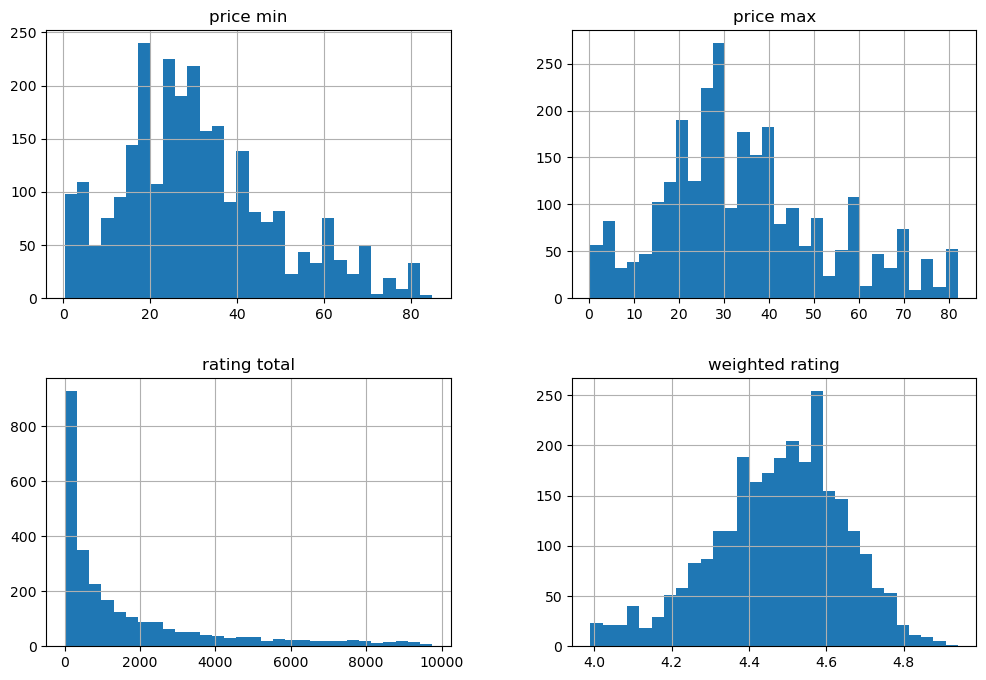

In [130]:
# Draw histograms of continuous columns
train_df[continuous_columns].hist(bins=30, figsize=(12, 8))
plt.show()

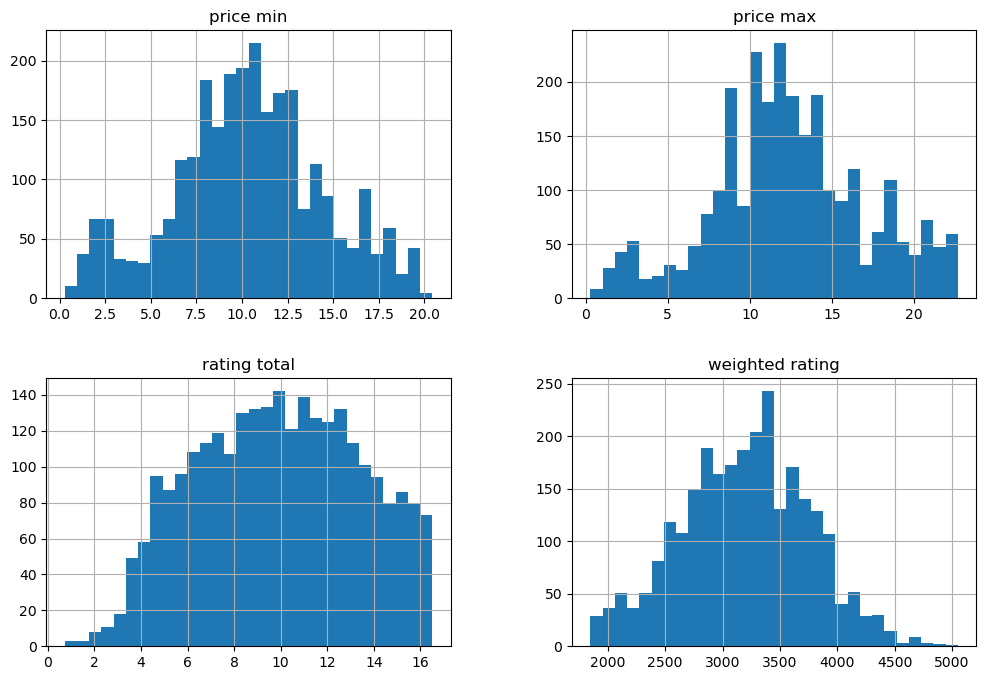

In [131]:
# Apply Box-Cox transformation to continuous columns and store the lambda
# to apply the same transformation to the test set

from scipy.stats import boxcox

lambdas = {}

for column in continuous_columns:
    train_df[column], lambdas[column] = boxcox(train_df[column] + 1)

# Draw histograms of continuous columns after Box-Cox transformation
train_df[continuous_columns].hist(bins=30, figsize=(12, 8))
plt.show()

#### Scale and Normalize Data

In [132]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical columns of the train data
scaler.fit(train_df[continuous_columns])

# Transform the numerical columns of the train data
continuous_columns_scaled = pd.DataFrame(
    scaler.transform(train_df[continuous_columns]), 
    columns=continuous_columns
)
continuous_columns_scaled.describe()

,price min,price max,rating total,weighted rating
count,2.682000e+03,2.682000e+03,2.682000e+03,2.682000e+03
mean,3.073190e-16,3.364613e-16,-1.629321e-16,3.444092e-17
std,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00
min,-2.430831e+00,-2.590044e+00,-2.619984e+00,-2.418867e+00
25%,-5.847799e-01,-6.269744e-01,-7.874020e-01,-6.704678e-01
50%,7.676557e-03,-4.272935e-02,1.210724e-02,1.832543e-02
75%,5.960489e-01,6.229621e-01,7.856217e-01,6.498645e-01
max,2.443700e+00,2.195003e+00,1.888455e+00,3.329215e+00


In [133]:
train_df.reset_index(drop=True, inplace=True)

# Concatenate the scaled columns with the train data
cleaned_train_df = pd.concat([train_df.drop(columns=continuous_columns), continuous_columns_scaled], axis=1)
cleaned_train_df.head()

,machine wash,origin usa,origin imported,origin unknown,color beige,color black,color blue,color brown,color gold,color gray,...,product_about_embedding_378,product_about_embedding_379,product_about_embedding_380,product_about_embedding_381,product_about_embedding_382,product_about_embedding_383,price min,price max,rating total,weighted rating
0,1,0,1,0,0,1,1,0,0,1,...,-0.038890,0.027864,-0.045299,-0.023311,-0.002508,0.083107,0.692374,1.305089,-1.044753,0.782801
1,1,0,1,0,0,1,1,1,0,0,...,-0.019035,-0.011115,-0.059188,0.004289,-0.038532,0.073039,-0.149387,-0.383433,0.629387,-0.988388
2,1,0,1,0,0,1,0,1,0,0,...,-0.018321,-0.031520,-0.027746,-0.046135,-0.025155,0.055162,0.077801,-0.153017,0.937614,-0.615809
3,1,0,0,1,0,1,0,0,0,1,...,-0.041369,0.015246,-0.068922,-0.028287,-0.005887,0.013037,0.292668,0.066065,0.553813,-1.666538
4,1,0,1,0,0,1,0,0,0,0,...,-0.048573,-0.001139,-0.018438,-0.023938,-0.024629,0.056587,-0.864663,-0.821792,1.586041,-0.392272


## Data Modeling

In [134]:
# Do all the same preprocessing steps for the test set
test_df = pd.read_csv("../data/raw/test.csv")

# Drop the same columns as the train set
test_df = test_df.drop(columns=drop_columns)

# Convert 'rating_percent' from string like "[[76, 12, 7, 2, 3]]"" to list of integers
test_df['rating_percent'] = test_df['rating_percent'].apply(convert_rating_percent)

# Scale the rating percent
test_df['rating_percent'] = test_df['rating_percent'].apply(scale_rating_percent)

# Calculate the weighted rating
test_df['weighted_rating'] = test_df['rating_percent'].apply(func=calc_weighted_rating)

# Drop the 'rating_percent' column
test_df.drop(columns=['rating_percent'], inplace=True)

# Check current result
test_df.head()

,title,price_min,price_max,rating_total,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,weighted_rating
0,ARIAT Men's M5 Straight Marston Straight Jean,86.95,89.02,85,[],Straight through seat and thigh\nSits below th...,100% Cotton,Machine Wash,Imported,4.45
1,"Vulcanodon Mens Robe Big and Tall with Hood, F...",24.99,28.99,1013,"['Black', 'Black+burgundy', 'Black/Dark Grey',...",SUPER SOFT LONG FLUFF AND PREMIUM MATERIAL： Th...,100% Polyester,Machine Wash,Imported,4.54
2,"Hanes Men’s Performance Tank, X-Temp Moisture-...",11.70,11.70,10850,"['Black', 'Light Steel', 'White', 'Deep Red', ...",2-PACK CONVENIENCE -This value pack comes with...,"60% Cotton, 40% Polyester",Machine Wash,Imported,4.55
3,Real Essentials 3 Pack: Men's Tech Fleece Ultr...,36.99,44.99,10041,"['Set B', 'Set G', 'Set C', 'Set H', 'Set I', ...",Supreme Comfort and Style: Elevate your wardro...,100% Polyester,Machine Wash,Imported,4.31
4,Under Armour Men's Armourfleece Hunt Hoodie,45.00,45.00,135,"['(001) Black / / Pitch Gray', '(044) Downpour...","Armour Fleece is light, breathable & stretchy ...",100% Polyester,Machine Wash,Imported,4.59


In [135]:
# Fill missing value of `product_about` with empty string
test_df['product_about'] = test_df['product_about'].fillna('')

# Fill missing value of `product_details.Fabric type`, `product_details.Care instructions`,
# and `product_details.Origin` with "unknown"
test_df['product_details.Fabric type'] = test_df['product_details.Fabric type'].fillna('unknown')
test_df['product_details.Care instructions'] = test_df['product_details.Care instructions'].fillna('unknown')

# Fill missing value of `product_details.Origin` with "unknown"
test_df['product_details.Origin'] = test_df['product_details.Origin'].fillna('unknown')

In [136]:
# Standardize column names
new_col_names = [standardize_column_names(col_name) for col_name in test_df.columns]
test_df.columns = new_col_names

# One-hot encode the 'care instructions' column
test_df['care instructions'] = test_df['care instructions'].apply(lambda x: x.lower())
test_df['machine wash'] = test_df['care instructions'].apply(lambda x: 1 if 'machine wash' in x else 0)

# Drop the 'care instructions' column
test_df.drop(columns=['care instructions'], inplace=True)

# One-hot encode the 'origin' column
test_df['origin'] = test_df['origin'].apply(lambda x: x.lower())
test_df['origin usa'] = test_df['origin'].apply(lambda x: 1 if 'us' in x else 0)
test_df['origin imported'] = test_df['origin'].apply(lambda x: 1 if 'import' in x else 0)
test_df['origin unknown'] = test_df['origin'].apply(lambda x: 1 if 'us' not in x and 'import' not in x else 0)

# Drop the 'origin' column
test_df.drop(columns=['origin'], inplace=True)

# One-hot encode the 'variants' column
test_df['variants'] = test_df['variants'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x.lower()))

for color in all_colors:
    test_df[f'color {color}'] = test_df['variants'].apply(lambda x: 1 if color in x else 0)

# Drop the 'variants' column
test_df.drop(columns=['variants'], inplace=True)

# One-hot encode the 'fabric type' column
test_df['fabric type'] = test_df['fabric type'].apply(lambda x: x.lower())

for fabric in fabrics:
    test_df[f'fabric {fabric}'] = test_df['fabric type'].apply(lambda x: 1 if fabric in x else 0)

# Drop the 'fabric type' column
test_df.drop(columns=['fabric type'], inplace=True)

# Embed the 'title' column
titles = test_df['title'].str.lower().to_list()
titles_embeddings = model.encode(titles, normalize_embeddings=True)

# Create a DataFrame from the embeddings
titles_embeddings_df = pd.DataFrame(titles_embeddings, columns=[f'title_embedding_{i}' for i in range(titles_embeddings.shape[1])])

# Reset index of test_df
test_df.reset_index(drop=True, inplace=True)

# Concatenate the embeddings DataFrame with the test DataFrame
test_df = pd.concat([test_df, titles_embeddings_df], axis=1)

# Embed the 'product about' column
product_abouts = test_df['product about'].values
product_abouts_embeddings = model.encode(product_abouts, normalize_embeddings=True)

# Create a DataFrame from the embeddings
product_abouts_embeddings_df = pd.DataFrame(product_abouts_embeddings, columns=[f'product_about_embedding_{i}' for i in range(product_abouts_embeddings.shape[1])])

# Reset index of test_df
test_df.reset_index(drop=True, inplace=True)

# Concatenate the embeddings DataFrame with the test DataFrame
test_df = pd.concat([test_df, product_abouts_embeddings_df], axis=1)

# Drop the 'title' and 'product about' columns
test_df.drop(columns=['title', 'product about'], inplace=True)

# Apply Box-Cox transformation to continuous columns
for column in continuous_columns:
    test_df[column] = boxcox(test_df[column] + 1, lmbda=lambdas[column])

# Scale the numerical columns of the test data
continuous_columns_scaled = pd.DataFrame(
    scaler.transform(test_df[continuous_columns]), 
    columns=continuous_columns
)

# Concatenate the scaled columns with the test data
cleaned_test_df = pd.concat([test_df.drop(columns=continuous_columns), continuous_columns_scaled], axis=1)
cleaned_test_df.head()

,machine wash,origin usa,origin imported,origin unknown,color beige,color black,color blue,color brown,color gold,color gray,...,product_about_embedding_378,product_about_embedding_379,product_about_embedding_380,product_about_embedding_381,product_about_embedding_382,product_about_embedding_383,price min,price max,rating total,weighted rating
0,1,0,1,0,0,0,0,0,0,0,...,-0.094419,0.014596,-0.037045,0.040736,-0.047894,-0.007237,2.513035,2.459839,-1.155882,-0.219375
1,1,0,1,0,0,1,0,0,0,0,...,-0.050820,-0.018651,-0.066430,-0.007218,-0.025735,0.064028,-0.208406,-0.209477,0.221467,0.327299
2,1,0,1,0,0,1,0,0,0,0,...,-0.042033,0.002708,-0.050444,-0.023218,-0.034918,0.026152,-1.117855,-1.348916,1.978102,0.390710
3,1,0,1,0,0,0,0,0,0,0,...,-0.031373,-0.011646,-0.023572,-0.046650,-0.025959,0.061780,0.446940,0.623082,1.912632,-0.988388
4,1,0,1,0,0,1,0,0,0,1,...,-0.038472,0.025229,-0.056674,-0.003767,-0.015692,0.072315,0.834963,0.623563,-0.929225,0.649864


In [137]:
X_train = cleaned_train_df.drop(columns=['rating total', 'weighted rating'])
y_train_total = cleaned_train_df['rating total']
y_train_weighted = cleaned_train_df['weighted rating']

X_test = cleaned_test_df.drop(columns=['rating total', 'weighted rating'])
y_test_total = cleaned_test_df['rating total']
y_test_weighted = cleaned_test_df['weighted rating']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=50,
    n_jobs=-1
)

# Fit the model
rf_model.fit(X_train, y_train_total)

In [68]:
# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test_total, rf_predictions)
r2 = r2_score(y_test_total, rf_predictions)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Mean Squared Error: 1.6196
R-squared Score: 0.1905

Top 10 Most Important Features:
                         feature  importance
840                    price min    0.041610
701  product_about_embedding_245    0.017104
413          title_embedding_341    0.008431
268          title_embedding_196    0.008342
13                    color navy    0.007010
5                    color black    0.006157
192          title_embedding_120    0.005560
134           title_embedding_62    0.005543
107           title_embedding_35    0.004871
288          title_embedding_216    0.004475


In [70]:
import joblib

joblib.dump(rf_model, "../models/rf_total_rating_model.pkl")

['../models/rf_total_rating_model.pkl']

In [72]:
# Train and save the model for weighted rating
# Create and train Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=50,
    n_jobs=-1
)

# Fit the model
rf_model.fit(X_train, y_train_weighted)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test_weighted, rf_predictions)

print(f"Mean Squared Error: {mse:.4f}")

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

ValueError: Input contains NaN.